**Universidad Nacional de Colombia**

**Diplomado en IA y AP**

**Leidy Natalia León Carvajal**

**lnleonc@unal.edu.co**

# **Autoencoders**

Cree un autoencoder para el conjunto de datos Fashion MNIST, usando una red convolucional. Los datos puede obtenerlos directamente en keras como se hizo el conjunto MNIST de dígitos.

In [1]:
# Importamos las librerías y utilidades necesarias para trabajar:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import CategoricalCrossentropy

In [18]:
fashion= tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()

In [19]:
print('Imágenes Entrenamiento=',x_train.shape,'\n')
print('Imágenes Prueba=',x_test.shape)

Imágenes Entrenamiento= (60000, 28, 28) 

Imágenes Prueba= (10000, 28, 28)


## **Normalización de Datos**

In [20]:
x_train=x_train/255
x_test=x_test/255

## **Visualización**

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

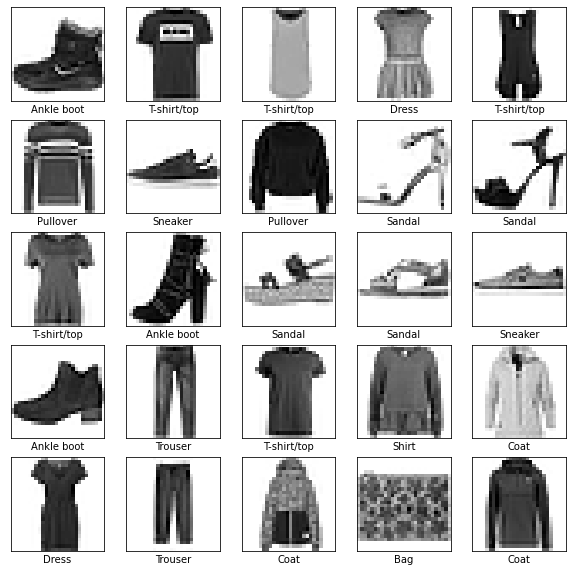

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## **Parámetros**

In [25]:
input_shape = (28*28,) # 784
intermediate_dim_1 = 128
intermediate_dim_2 = 64
intermediate_dim_3 = 32
intermediate_dim_4 = 16
latent_dim = 2

## **Definición del Encoder y Decoder**

In [26]:
# Definimos el modelo de encoder
inputs = Input(shape=input_shape,name='encoder_input')
x = Activation('relu')(inputs)
x = Dense(intermediate_dim_1, name='hidden_layer_1_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2, name='hidden_layer_2_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3, name='hidden_layer_3_e')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_4, name='hidden_layer_4_e')(x)
x = Activation('relu')(x)
outputs = Dense(latent_dim, name='latent_space')(x)

#outputs = LayerNormalization(axis=1)(x)
encoder = Model(inputs=inputs, outputs=outputs, name='dense_encoder')
encoder.summary()

Model: "dense_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
activation_11 (Activation)   (None, 784)               0         
_________________________________________________________________
hidden_layer_1_e (Dense)     (None, 128)               100480    
_________________________________________________________________
activation_12 (Activation)   (None, 128)               0         
_________________________________________________________________
hidden_layer_2_e (Dense)     (None, 64)                8256      
_________________________________________________________________
activation_13 (Activation)   (None, 64)                0         
_________________________________________________________________
hidden_layer_3_e (Dense)     (None, 32)              

In [27]:
# Definimos el modelo decoder
latent_input = Input(shape = (latent_dim,), name='decoder_input')
x = Activation('relu')(latent_input)
x = Dense(intermediate_dim_4 , name='hidden_layer_de_4_d')(latent_input)
x = Activation('relu')(x)
x = Dense(intermediate_dim_3 , name='hidden_layer_de_3_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_2 , name='hidden_layer_de_2_d')(x)
x = Activation('relu')(x)
x = Dense(intermediate_dim_1 , name='hidden_layer_de_1_d')(x)
x = Activation('relu')(x)
x = Dense(input_shape[0], name='original_space')(x)
x = Activation('sigmoid')(x)

decoder = Model (inputs=latent_input, outputs=x, name='dense_decoder')
decoder.summary()

Model: "dense_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
hidden_layer_de_4_d (Dense)  (None, 16)                48        
_________________________________________________________________
activation_17 (Activation)   (None, 16)                0         
_________________________________________________________________
hidden_layer_de_3_d (Dense)  (None, 32)                544       
_________________________________________________________________
activation_18 (Activation)   (None, 32)                0         
_________________________________________________________________
hidden_layer_de_2_d (Dense)  (None, 64)                2112      
_________________________________________________________________
activation_19 (Activation)   (None, 64)              

## **Autoencoder**

In [28]:
autoencoder = Model(inputs=inputs, 
                    outputs=decoder(encoder(inputs)),
                    name='autoencoder_mnist_fashion_model')

#Summary
autoencoder.summary()

Model: "autoencoder_mnist_fashion_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
dense_encoder (Model)        (None, 2)                 111378    
_________________________________________________________________
dense_decoder (Model)        (None, 784)               112160    
Total params: 223,538
Trainable params: 223,538
Non-trainable params: 0
_________________________________________________________________


## **Entrenamos el Modelo**

In [29]:
optimizer = Adam(learning_rate=1e-3)
loss_fn = MeanSquaredError()
autoencoder.compile(optimizer= optimizer, loss = loss_fn)

In [30]:
x_train = x_train.reshape(60000, 784).astype("float32")
x_test = x_test.reshape(10000, 784).astype("float32")

In [31]:
epochs = 20
batch_size = 64

In [32]:
history = autoencoder.fit(x_train, x_train, epochs = epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
844/844 [==============================] - 13s 15ms/step - loss: 0.0445 - val_loss: 0.0322
Epoch 2/20
844/844 [==============================] - 14s 16ms/step - loss: 0.0307 - val_loss: 0.0303
Epoch 3/20
844/844 [==============================] - 14s 17ms/step - loss: 0.0293 - val_loss: 0.0298
Epoch 4/20
844/844 [==============================] - 14s 17ms/step - loss: 0.0285 - val_loss: 0.0285
Epoch 5/20
844/844 [==============================] - 15s 18ms/step - loss: 0.0280 - val_loss: 0.0285
Epoch 6/20
844/844 [==============================] - 14s 17ms/step - loss: 0.0277 - val_loss: 0.0281
Epoch 7/20
844/844 [==============================] - 15s 18ms/step - loss: 0.0272 - val_loss: 0.0272
Epoch 8/20
844/844 [==============================] - 16s 19ms/step - loss: 0.0269 - val_loss: 0.0268
Epoch 9/20
844/844 [==============================] - 16s 18ms/step - loss: 0.0265 - val_loss: 0.0265
Epoch 10/20
844/844 [==============================] - 16s 19ms/step - loss: 0.026

In [34]:
histograma = pd.DataFrame(history.history)
histograma['epoch'] = history.epoch 
histograma.tail()

,loss,val_loss,epoch
15,0.025465,0.025786,15
16,0.025400,0.025630,16
17,0.025198,0.025378,17
18,0.025107,0.025239,18
19,0.025140,0.025378,19


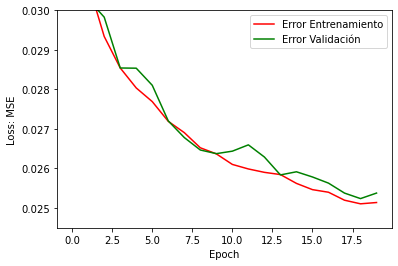

In [48]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss: MSE')
plt.plot(histograma['epoch'], histograma['loss'],
           label='Error Entrenamiento',color='red')
plt.plot(histograma['epoch'], histograma['val_loss'],
           label='Error Validación',color='green')
plt.ylim([0.0245,0.03])
plt.legend()
plt.show()

In [39]:
autoencoder.evaluate(x_test,x_test) 
autoencoder.evaluate(x_train,x_train) 

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0250


0.02503548003733158

### Prueba del Modelo

In [42]:
decoded_image_test = autoencoder.predict(x_test)

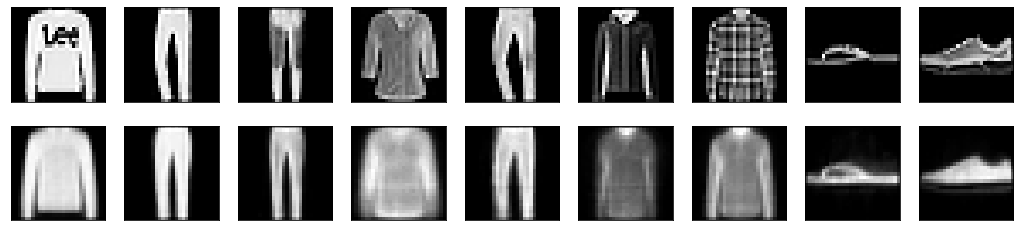

In [43]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # Display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_image_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()